In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# pip install webcolors
import webcolors
# 이 함수는 그렇게 정확하지는 않음
def closest_color_name(rgb):
    try:
        # 정확히 일치하는 색상 이름이 있는지 확인
        color_name = webcolors.rgb_to_name(rgb)
    except ValueError:
        # 일치하는 색상이 없으면 가장 가까운 색상 찾기
        min_colors = {}
        for hex_code, name in webcolors.CSS3_HEX_TO_NAMES.items():
            r, g, b = webcolors.hex_to_rgb(hex_code)
            # 유클리드 거리 계산
            distance = (r - rgb[0]) ** 2 + (g - rgb[1]) ** 2 + (b - rgb[2]) ** 2
            min_colors[distance] = name
        color_name = min_colors[min(min_colors.keys())]
    return color_name

In [13]:
# 주요 색상을 추출하는 함수
def extract_dominant_colors(image_path, num_colors=5):
    # 이미지 읽기
    image = cv2.imread(image_path)
    
    # BGR에서 RGB로 변환
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 이미지를 2D 배열로 변환
    pixels = image.reshape(-1, 3)
    # print(pixels)
    
    # KMeans 클러스터링을 사용하여 주요 색상 추출
    kmeans = KMeans(n_clusters=num_colors)
    kmeans.fit(pixels)
    colors = kmeans.cluster_centers_.astype(int)
    counts = np.bincount(kmeans.labels_)
    
    # 주요 색상과 비율 출력
    for i, color in enumerate(colors):
        closest_color = closest_color_name(tuple(color))
        print(f"색상 {i+1}: RGB {tuple(color)}, 가까운 색: {closest_color}, 비율: {counts[i] / len(kmeans.labels_):.2%}")
    
    # 시각화를 위한 주요 색상 차트 생성
    plt.figure(figsize=(8, 2))
    plt.axis("off")
    plt.imshow([colors])
    plt.show()
    
    return colors

C:\Users\Sang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


색상 1: RGB (197, 189, 125), 가까운 색: darkkhaki, 비율: 15.19%
색상 2: RGB (62, 90, 43), 가까운 색: darkolivegreen, 비율: 26.77%
색상 3: RGB (175, 46, 61), 가까운 색: brown, 비율: 12.40%
색상 4: RGB (253, 252, 248), 가까운 색: snow, 비율: 17.82%
색상 5: RGB (171, 171, 31), 가까운 색: yellowgreen, 비율: 27.81%


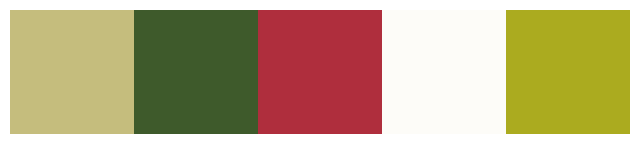

array([[197, 189, 125],
       [ 62,  90,  43],
       [175,  46,  61],
       [253, 252, 248],
       [171, 171,  31]])

In [14]:
# 함수 실행
extract_dominant_colors('test.jpg', num_colors=5)
# RGB 결과는 각 군집의 중심 색

C:\Users\Sang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


색상 1: RGB (31, 49, 31), 가까운 색: darkslategray, 비율: 8.08%
색상 2: RGB (162, 163, 37), 가까운 색: yellowgreen, 비율: 11.31%
색상 3: RGB (254, 254, 253), 가까운 색: white, 비율: 16.25%
색상 4: RGB (115, 135, 51), 가까운 색: olivedrab, 비율: 13.57%
색상 5: RGB (173, 40, 58), 가까운 색: brown, 비율: 11.06%
색상 6: RGB (191, 133, 119), 가까운 색: rosybrown, 비율: 5.01%
색상 7: RGB (226, 217, 167), 가까운 색: palegoldenrod, 비율: 5.34%
색상 8: RGB (61, 100, 47), 가까운 색: darkolivegreen, 비율: 12.23%
색상 9: RGB (188, 203, 106), 가까운 색: darkkhaki, 비율: 8.05%
색상 10: RGB (216, 197, 6), 가까운 색: goldenrod, 비율: 9.11%


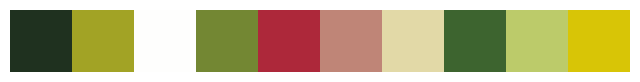

array([[ 31,  49,  31],
       [162, 163,  37],
       [254, 254, 253],
       [115, 135,  51],
       [173,  40,  58],
       [191, 133, 119],
       [226, 217, 167],
       [ 61, 100,  47],
       [188, 203, 106],
       [216, 197,   6]])

In [15]:
extract_dominant_colors('test.jpg', num_colors=10)